#DATA MINING/DATA SCRAPING/DATA RETRIEVAL

In [ ]:
from google.colab import data_table
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
data_table.disable_dataframe_formatter()

In [ ]:
from google.colab import drive
# Mounted the drive from where the source excel file will be loaded and destination file will be created
drive.mount('/content/drive')
%cd /content/drive/  Shareddrives/601

Mounted at /content/drive
/content/drive/ Shareddrives/601


#DATA CLEANING/TIDYING, IMPUTATIONS, VALIDATION CHECKS

In [ ]:
%cd Datasets

/content/drive/ Shareddrives/601/otherdata


Loading the Datasets 

In [ ]:
#Diseases Dataset
df_diseases = pd.read_csv('burden-of-disease-by-cause.csv')
df = df_diseases

In [ ]:
#Unemployment Dataset
df_unemp = pd.read_excel('UNRATE.xlsx')
df_unemp['Year'] = df_unemp['observation_date'].dt.year

#Data Merging
df_unemp = df_unemp.groupby(["Year"])['Unemployment Rate'].mean().reset_index()
df_unemp = df_unemp.iloc[-32:]
df = pd.merge(df, df_unemp, on=["Year"],how='outer')

In [ ]:
# Keeping record between 1990-2016
df = df.iloc[:27]

In [ ]:
df

,Year,HIV/AIDS and Tuberculosis,Cardiovascular diseases,Chronic respiratory diseases,Neurological disorders,Mental and substance use disorders,"Diabetes, urogenital, blood, and endocrine diseases",Transport injuries,Conflict and terrorism,Interpersonal violence,Unemployment Rate
0,1990,1.462211e+06,15554875.51,3658741.797,4490129.739,5551677.812,4088397.481,3430056.010,1127.850298,1603489.448,5.616667
1,1991,1.674025e+06,15453187.91,3677636.908,4590055.100,5591478.482,4141282.270,3387288.427,9915.856214,1633646.792,6.850000
2,1992,1.864745e+06,15268250.30,3686993.324,4678112.748,5636866.306,4214446.321,3310709.508,711.306646,1616468.445,7.491667
3,1993,2.050553e+06,15561093.75,3772392.366,4799128.593,5686681.530,4311189.479,3345104.494,3577.990403,1645785.521,6.908333
4,1994,2.249767e+06,15509136.52,3818014.142,4885765.393,5742948.002,4401184.643,3352912.666,2355.885552,1610712.882,6.100000
5,1995,2.265394e+06,15573642.10,3894026.779,4976910.427,5805574.971,4503483.409,3331361.055,13790.426320,1562327.495,5.591667
6,1996,1.692617e+06,15416767.65,3953744.680,5036180.724,5893928.592,4593715.511,3297853.821,2618.895169,1463212.225,5.408333
7,1997,9.999211e+05,15297850.32,4041707.456,5083525.856,6011548.420,4691905.489,3234454.713,1098.029107,1421361.536,4.941667
8,1998,8.142201e+05,15242381.33,4157869.620,5134973.461,6142002.209,4827758.435,3178620.354,1248.117148,1324907.960,4.500000
9,1999,8.381451e+05,15332525.93,4307731.981,5207184.723,6266813.116,4968399.096,3187658.087,1981.056404,1275379.676,4.216667


Pre-Processing the Data

In [ ]:
df_diseases.columns

Index(['Year', 'HIV/AIDS and Tuberculosis', ' Cardiovascular diseases',
       ' Chronic respiratory diseases ', ' Neurological disorders ',
       'Mental and substance use disorders',
       'Diabetes, urogenital, blood, and endocrine diseases',
       ' Transport injuries', 'Conflict and terrorism',
       ' Interpersonal violence'],
      dtype='object')

In [ ]:
df.drop(['HIV/AIDS and Tuberculosis',
       ' Chronic respiratory diseases ',
       'Mental and substance use disorders',
       'Diabetes, urogenital, blood, and endocrine diseases',
       ' Transport injuries', 'Conflict and terrorism'], axis=1, inplace=True)

In [ ]:
df

,Year,Cardiovascular diseases,Neurological disorders,Interpersonal violence,Unemployment Rate
0,1990,15554875.51,4490129.739,1603489.448,5.616667
1,1991,15453187.91,4590055.100,1633646.792,6.850000
2,1992,15268250.30,4678112.748,1616468.445,7.491667
3,1993,15561093.75,4799128.593,1645785.521,6.908333
4,1994,15509136.52,4885765.393,1610712.882,6.100000
5,1995,15573642.10,4976910.427,1562327.495,5.591667
6,1996,15416767.65,5036180.724,1463212.225,5.408333
7,1997,15297850.32,5083525.856,1421361.536,4.941667
8,1998,15242381.33,5134973.461,1324907.960,4.500000
9,1999,15332525.93,5207184.723,1275379.676,4.216667


In [ ]:
min_max_scaler = MinMaxScaler()
df[[' Cardiovascular diseases', ' Neurological disorders ',
       ' Interpersonal violence']] = min_max_scaler.fit_transform(df[[' Cardiovascular diseases',' Neurological disorders ',
       ' Interpersonal violence']])
df[["Unemployment Rate"]] = min_max_scaler.fit_transform(df[["Unemployment Rate"]])

In [ ]:
df = df.round(2)

#Data Analysis

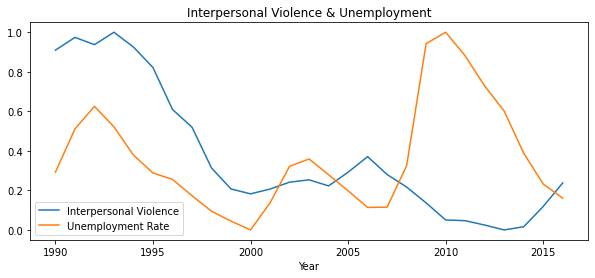

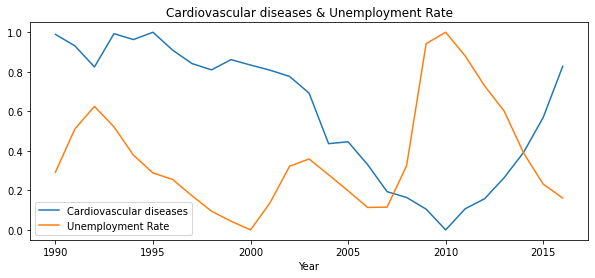

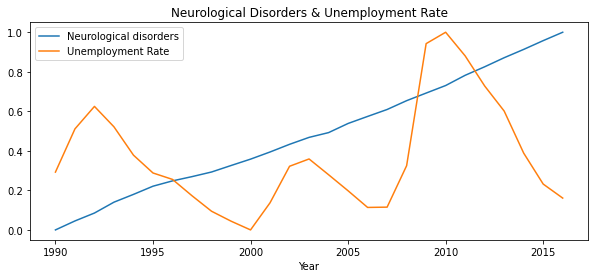

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df["Year"], df[' Interpersonal violence'],label = 'Interpersonal Violence')
plt.plot(df["Year"], df["Unemployment Rate"],label = 'Unemployment Rate')
plt.title('Interpersonal Violence & Unemployment')
plt.xlabel('Year')
plt.ylabel('')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df["Year"], df[' Cardiovascular diseases'],label = 'Cardiovascular diseases')
plt.plot(df["Year"], df["Unemployment Rate"],label = 'Unemployment Rate')
plt.title('Cardiovascular diseases & Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df["Year"], df[' Neurological disorders '],label = 'Neurological disorders')
plt.plot(df["Year"], df["Unemployment Rate"],label = 'Unemployment Rate')
plt.title('Neurological Disorders & Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#df_unemp_women['Women Unemp'].corr(df_socialstatus["Married Women"])
column_1 = df[' Interpersonal violence']
column_2 = df["Unemployment Rate"]
correlation = column_1.corr(column_2)
print("Correlation between Interpersonal Violence & Unemployment: ",correlation)

column_1 = df[' Cardiovascular diseases']
column_2 = df["Unemployment Rate"]
correlation = column_1.corr(column_2)
print("Correlation between Cardiovascular Diseases & Unemployment: ",correlation)

column_1 = df[' Neurological disorders ']
column_2 = df["Unemployment Rate"]
correlation = column_1.corr(column_2)
print("Correlation between Neurological Disorders & Unemployment: ",correlation)

Correlation between Interpersonal Violence & Unemployment:  -0.09276166896476278
Correlation between Cardiovascular Diseases & Unemployment:  -0.5179953373002226
Correlation between Neurological Disorders & Unemployment:  0.23191308312192288


#Data Preparation for Machine Learning

In [ ]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
#X contains the issues
#y contains the unemployment rate

(21, 3)
(21,)


#Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.552958870900767

In [ ]:
model.coef_

array([-0.86156905,  0.06657234,  0.52088533])

In [ ]:
mod = sm.OLS(y_train, X_train).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:      Unemployment Rate   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.743
Method:                 Least Squares   F-statistic:                              21.27
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                    3.81e-06
Time:                        16:46:44   Log-Likelihood:                          1.4214
No. Observations:                  21   AIC:                                      3.157
Df Residuals:                      18   BIC:                                      6.291
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

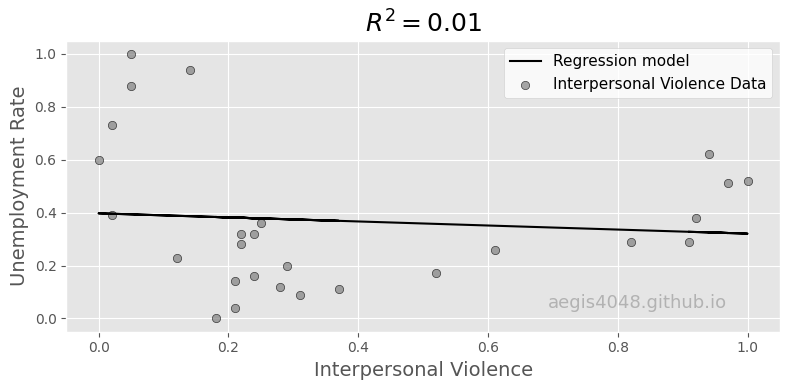

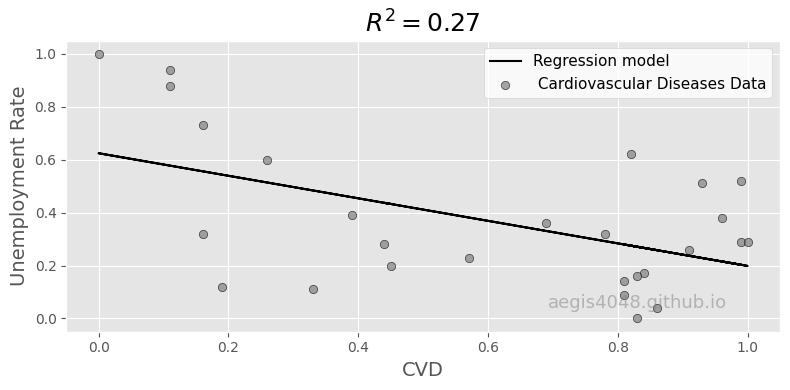

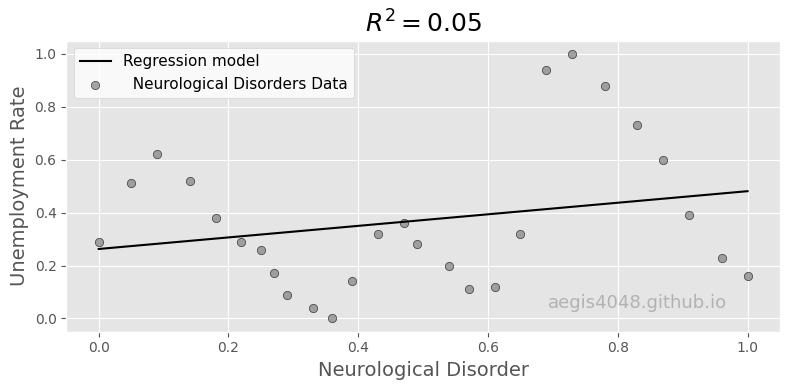

In [ ]:
################################# Interpersonal Violence ############################################

X = df[' Interpersonal violence'].values.reshape(-1,1)
y = df['Unemployment Rate'].values

################################################ Train #############################################

model1 = LinearRegression()
ols = model1.fit(X, y)
response = ols.predict(X)

############################################## Evaluate ############################################

r2 = ols.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Interpersonal Violence Data')
ax.set_ylabel('Unemployment Rate', fontsize=14)
ax.set_xlabel('Interpersonal Violence', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
fig.tight_layout()

################################# CVD ###############################################################

X = df[' Cardiovascular diseases'].values.reshape(-1,1)
y = df['Unemployment Rate'].values

################################################ Train #############################################

model1 = LinearRegression()
ols = model1.fit(X, y)
response = ols.predict(X)

############################################## Evaluate ############################################

r2 = ols.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label=' Cardiovascular Diseases Data')
ax.set_ylabel('Unemployment Rate', fontsize=14)
ax.set_xlabel('CVD', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
fig.tight_layout()

################################# Neurological Disorders ################################################################

X = df[' Neurological disorders '].values.reshape(-1,1)
y = df['Unemployment Rate'].values

################################################ Train #############################################

model1 = LinearRegression()
ols = model1.fit(X, y)
response = ols.predict(X)

############################################## Evaluate ############################################

r2 = ols.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='  Neurological Disorders Data')
ax.set_ylabel('Unemployment Rate', fontsize=14)
ax.set_xlabel('Neurological Disorder', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
fig.tight_layout()

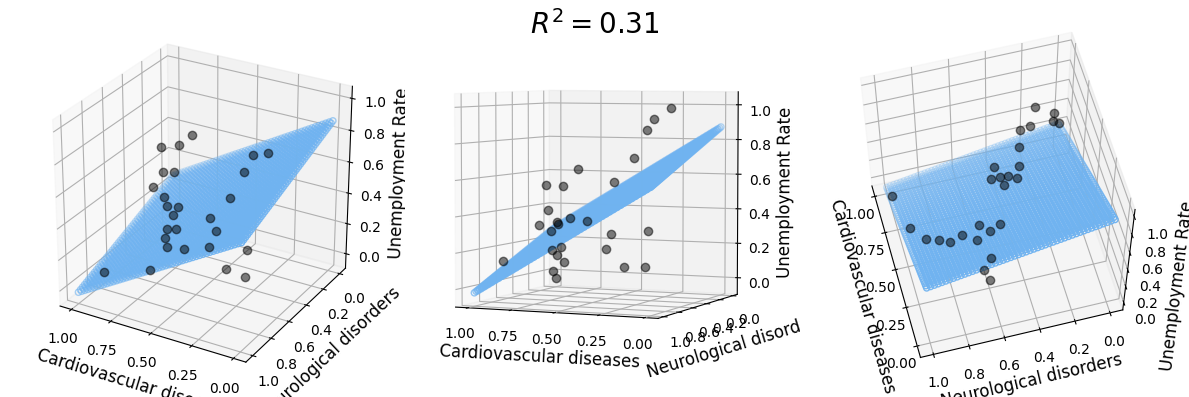

In [ ]:
######################################## Data preparation #########################################


X = df[[' Cardiovascular diseases',' Neurological disorders ']].values.reshape(-1,2)

Y = df['Unemployment Rate']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 1)   # range of porosity values
y_pred = np.linspace(0, 1)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel(' Cardiovascular diseases', fontsize=12)
    ax.set_ylabel(' Neurological disorders ', fontsize=12)
    ax.set_zlabel('Unemployment Rate', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

#Random Forest Regression

In [ ]:
# create regressor object
regressor = RandomForestRegressor()
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(X_test)  # test the output by changing values

In [ ]:
accuracy = regressor.score(X_train,y_train)
print(accuracy)

0.9414225950831722


In [ ]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

MAE:  0.1330333333333333
MSE:  0.034118743333333326


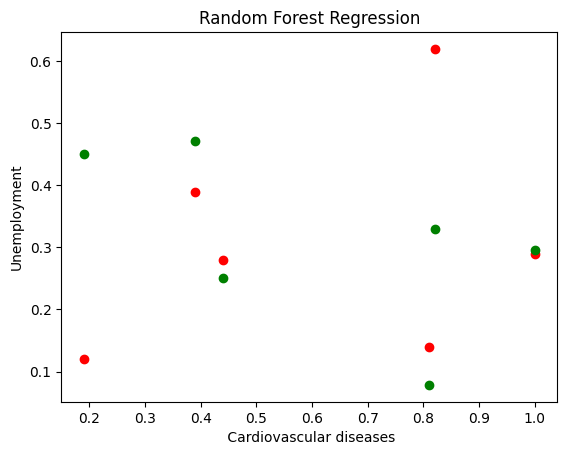

In [ ]:
plt.scatter(X_test[' Cardiovascular diseases'].values, y_test, color = 'red')
plt.scatter(X_test[' Cardiovascular diseases'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel(' Cardiovascular diseases')
plt.ylabel('Unemployment')
plt.show() 

In [ ]:
feature_importances = pd.DataFrame(regressor.feature_importances_, 
                                   index =[' Cardiovascular diseases', ' Neurological disorders ',
       ' Interpersonal violence'],  columns=['Importance']).sort_values('Importance', ascending=False)

In [ ]:
feature_importances.columns

Index(['Importance'], dtype='object')

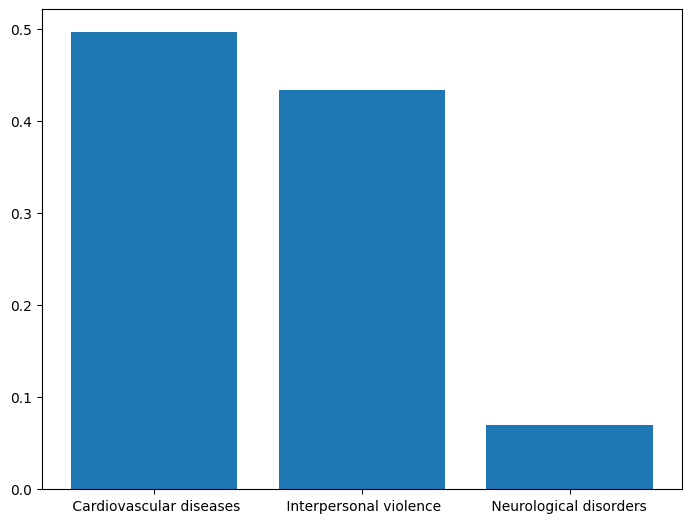

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(feature_importances.index,feature_importances['Importance'])
plt.show()